In [1]:
from sympy import *
init_printing()

In [14]:
#subscript 0 = star, 1 = planetesimal, 2 = planet
m0,v,b,c,G,Om,Ov,Or = symbols("m_0, v, b, c, G, O_m, O_v, O_r")
r0x,r0y,r1x,r1y,r2x,r2y,p0x,p0y,p1x,p1y,p2x,p2y = symbols("r_{0x},r_{0y},r_{1x},r_{1y},r_{2x},r_{2y},p_{0x},p_{0y},p_{1x},p_{1y},p_{2x},p_{2y}")
v0x,v0y,v1x,v1y,v2x,v2y = symbols("v_{0x},v_{0y},v_{1x},v_{1y},v_{2x},v_{2y}")

In [15]:
#masses
m1 = m0*b*Om**2
m2 = m0*c*Om
v0 = Ov*v

r0 = sqrt(r0x**2 + r0y**2)
r1 = sqrt(r1x**2 + r1y**2)
r2 = sqrt(r2x**2 + r2y**2)
p0 = sqrt(p0x**2 + p0y**2)
p1 = sqrt(p1x**2 + p1y**2)
p2 = sqrt(p2x**2 + p2y**2)

#Jacobi variables
M1 = m0 + m1
M2 = m0 + m1 + m2
m1p = m1*m0/M1           #p for prime, as in jacobi coordinates
m2p = m2*M1/M2
r1p = r1 - r0
r2p = r2 - (m1*r1 + m0*r0)/M1
p1p = m1p*(p1/m1 - p0/m0)
p2p = m2p*(p2/m2 - p1/M1 - p0/M1)

In [17]:
H_k = p2p*p2p/m2p/2 + p1p*p1p/m1p/2 - G*M1*m1p/r1p - G*M2*m2p/r2p
H_i = -G*m1*m2/(r1 - r2) - G*m0*m2/(r0 - r2) + G*M2*m2p/r2p

In [18]:
A0 = diff(H_k,p0x)*diff(H_i,r0x) + diff(H_k,p0y)*diff(H_i,r0y)
A1 = diff(H_k,p1x)*diff(H_i,r1x) + diff(H_k,p1y)*diff(H_i,r1y)
A2 = diff(H_k,p2x)*diff(H_i,r2x) + diff(H_k,p2y)*diff(H_i,r2y)
A = A0 + A1 + A2
B = H_k/2 + H_i

In [19]:
#differentiate
diff0 = diff(A,r0x)*diff(B,p0x) - diff(A,p0x)*diff(B,r0x) + diff(A,r0y)*diff(B,p0y) - diff(A,p0y)*diff(B,r0y)
diff1 = diff(A,r1x)*diff(B,p1x) - diff(A,p1x)*diff(B,r1x) + diff(A,r1y)*diff(B,p1y) - diff(A,p1y)*diff(B,r1y)
diff2 = diff(A,r2x)*diff(B,p2x) - diff(A,p2x)*diff(B,r2x) + diff(A,r2y)*diff(B,p2y) - diff(A,p2y)*diff(B,r2y)
result = diff0 + diff1 + diff2

In [21]:
R0,R1,R2 = symbols("R_0,R_1,R_2")
C,D,E,F = symbols("C, D, E, F")

result = result.subs({sqrt(p0x**2 + p0y**2):m0*v0,sqrt(p1x**2 + p1y**2):m1*v,sqrt(p2x**2 + p2y**2):m2*v})
result = result.subs({v-v0:v, -Om**2*b*m0*v/(Om**2*b*m0+m0)-m0*v0/(Om**2*b*m0+m0)+v:v, -Om**2*b*(v-v0)-Om*c*v:-Om*c*v, -Om*c*v+v-v0:v, -Om*c*v/2+v/2-v0/2:v/2})
result = result.subs({Om**2*b*m0+m0:m0, Om**2*b*m0+Om*c*m0+m0:m0, Om**2*b/m0+Om*c/m0:Om*c/m0, Om*c/m0+1/(Om**2*b*m0):1/(Om**2*b*m0), Om*c/m0-1/m0:1/m0})

result = result.subs({sqrt(r0x**2 + r0y**2):R0,sqrt(r1x**2 + r1y**2):R1,sqrt(r2x**2 + r2y**2):R2})
result = result.subs({R0 - R2:C, R1 - R2:D, R2 - (Om**2*b*m0*R1 + m0*r0)/(Om**2*b*m0 + m0):E})
result = result.subs({p0x:m0*v0,p0y:m0*v0,p1x:m1*v,p1y:m1*v,p2x:m2*v,p2y:m2*v})

In [39]:
resulte = expand(result)
resulte = resulte.subs({Om**11:0,Om**10:0,Om**9:0,Om**8:0,Om**7:0,Om**6:0,Om**5:0,Om**4:0})
#resulte

In [40]:
#remaining terms are multiplicative (e.g. R0*R1*R2), so take order of magnitude
R = symbols("R")
resulte = resulte.subs({r0x:Or*R,r0y:Or*R,r1x:R,r1y:R,r2x:R,r2y:R})
resulte = resulte.subs({R0:Or*R,R1:R,R2:R})
resulte = resulte.subs({Or**3:0,Or**2:0})

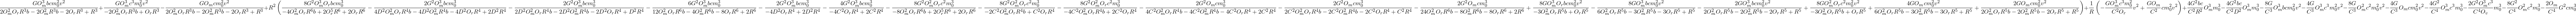

In [43]:
resultc = collect(resulte,R)
resultc

In [ ]:
result = result.subs({O0**2:0, O1**2:0})
result = factor(result)
result